# Imports

In [1]:
import base64
import os
import unittest

import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests

# Setting input image and helper functions

In [13]:
BASE_PATH = os.path.abspath('')
folder_path = os.path.join(BASE_PATH, 'tests', 'images', 'val')
files = os.listdir(folder_path)
filename = os.path.join(folder_path, files[7])
with open(filename, "rb") as image_file:
    encoded_bytes = base64.b64encode(image_file.read())
    header = 'data:image/jpg;base64,'
    base64_string = header+encoded_bytes.decode('utf-8')

urlBase = "http://localhost:5000/"
# urlBase = "https://niigata-tongue-dev.azurewebsites.net/"
path = 'inference'

def imshow(image, gray = False):
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111)
    if gray:
        ax.imshow(image, 'gray');
    else:
        ax.imshow(image);

# Send request and receive response

In [16]:
%%time
myobj = {'image': base64_string}
response = requests.post(urlBase+path, json = myobj)
response.raise_for_status()  # raises exception when not a 2xx response
if response.status_code != 204:
    print('jsoning response')
    res = response.json()

HTTPError: 500 Server Error: INTERNAL SERVER ERROR for url: http://localhost:5000/inference

# Decode and display outputs

<Figure size 1000x500 with 0 Axes>

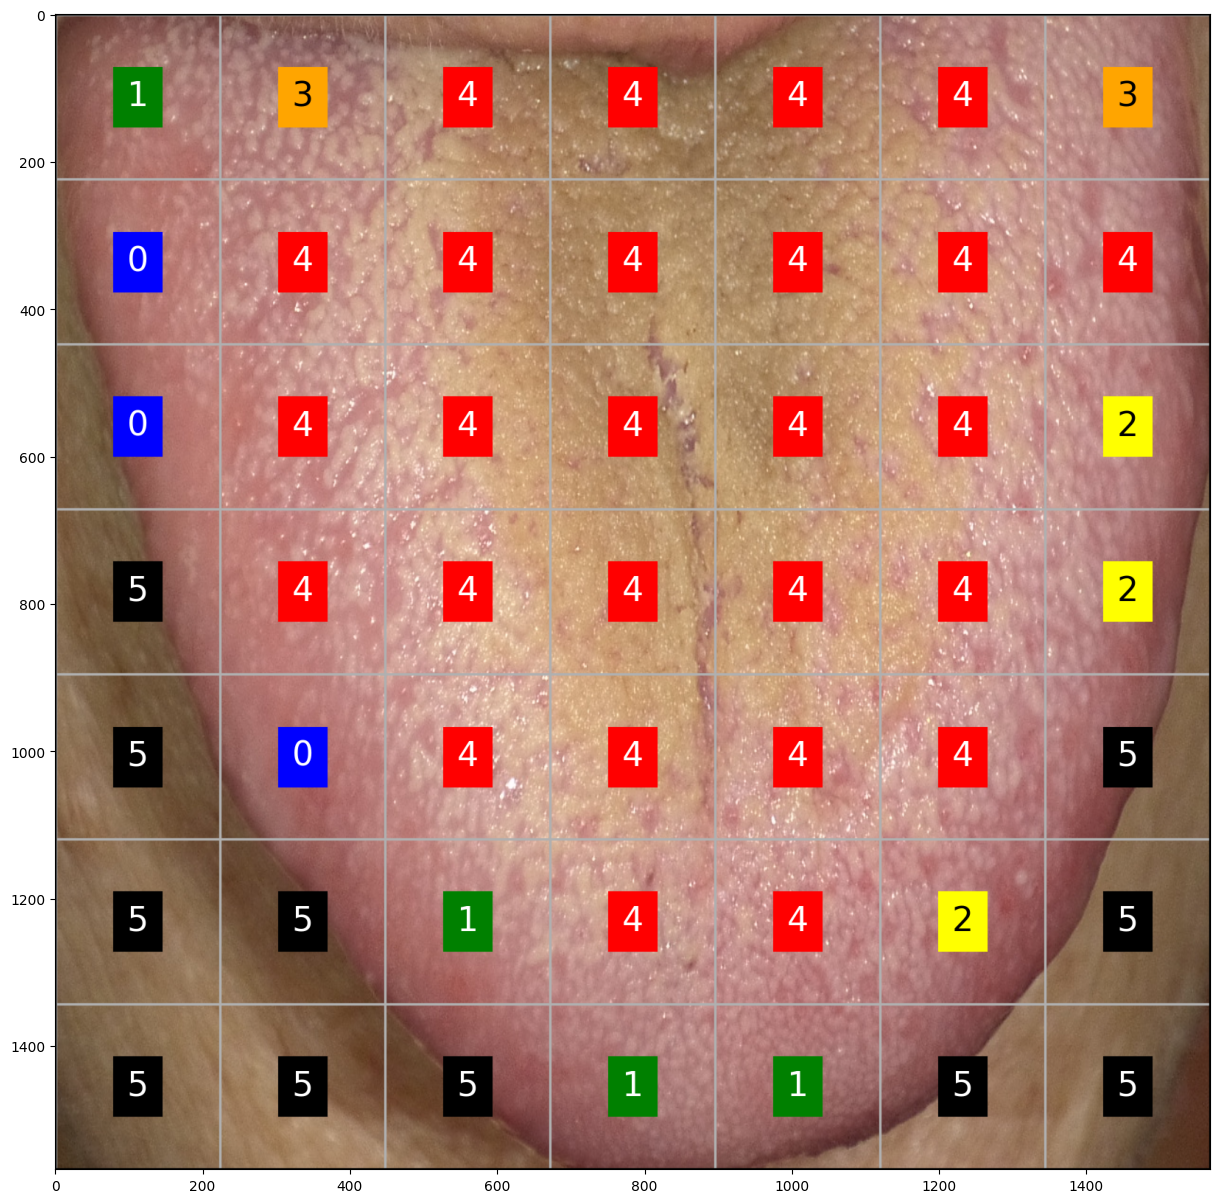

In [17]:
image_segs = res['image_segments']
nparr = np.frombuffer(base64.b64decode(image_segs.split('base64,')[1]), np.uint8)
raw_image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
raw_image = cv2.cvtColor(raw_image, cv2.COLOR_RGB2BGR)
plt.figure(figsize=(10, 5))
imshow(raw_image)